In [147]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

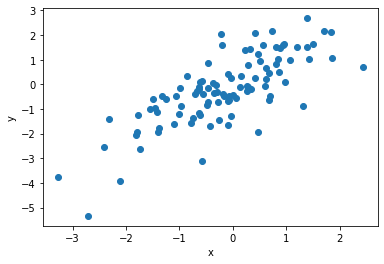

In [148]:
X = torch.randn(100,1)
y = X + torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [149]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [150]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)
print(list(model.parameters()))

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [151]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [152]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-2, 2])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

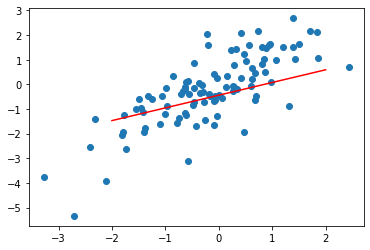

In [153]:
plot_fit('Initial Model')

In [154]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [157]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.8188895583152771
epoch: 1 loss: 0.8185644745826721
epoch: 2 loss: 0.8182508945465088
epoch: 3 loss: 0.8179489970207214
epoch: 4 loss: 0.8176577091217041
epoch: 5 loss: 0.8173771500587463
epoch: 6 loss: 0.8171067237854004
epoch: 7 loss: 0.8168457746505737
epoch: 8 loss: 0.8165945410728455
epoch: 9 loss: 0.8163522481918335
epoch: 10 loss: 0.8161187767982483
epoch: 11 loss: 0.8158937692642212
epoch: 12 loss: 0.815676748752594
epoch: 13 loss: 0.8154674768447876
epoch: 14 loss: 0.815265953540802
epoch: 15 loss: 0.8150716423988342
epoch: 16 loss: 0.8148842453956604
epoch: 17 loss: 0.8147037625312805
epoch: 18 loss: 0.8145296573638916
epoch: 19 loss: 0.8143619298934937
epoch: 20 loss: 0.8142001628875732
epoch: 21 loss: 0.814044177532196
epoch: 22 loss: 0.8138939142227173
epoch: 23 loss: 0.8137490749359131
epoch: 24 loss: 0.8136091828346252
epoch: 25 loss: 0.8134744763374329
epoch: 26 loss: 0.8133447766304016
epoch: 27 loss: 0.8132195472717285
epoch: 28 loss: 0.813098847866058

Text(0.5, 0, 'epoch')

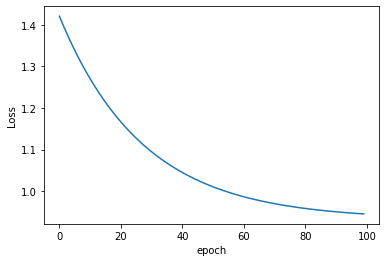

In [142]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

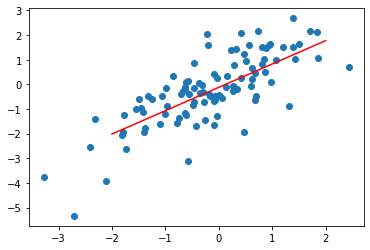

In [156]:
plot_fit("Trained Model")